               Íbex
Data               
2000-01-03  11610.0
2000-01-04  11206.6
2000-01-05  10863.1
2000-01-06  10863.1
2000-01-07  11102.4
...             ...
2024-08-26  11265.5
2024-08-27  11326.9
2024-08-28  11332.0
2024-08-29  11358.6
2024-08-30  11401.9

[9007 rows x 1 columns]
[0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0. ]
0.0


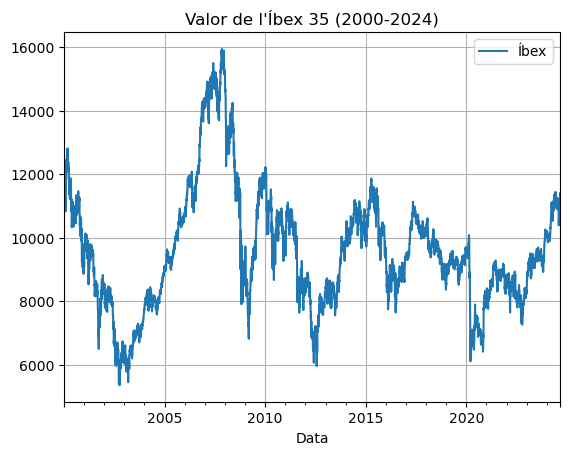

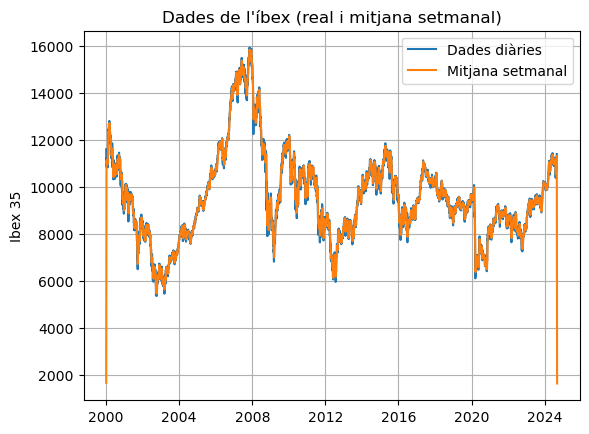

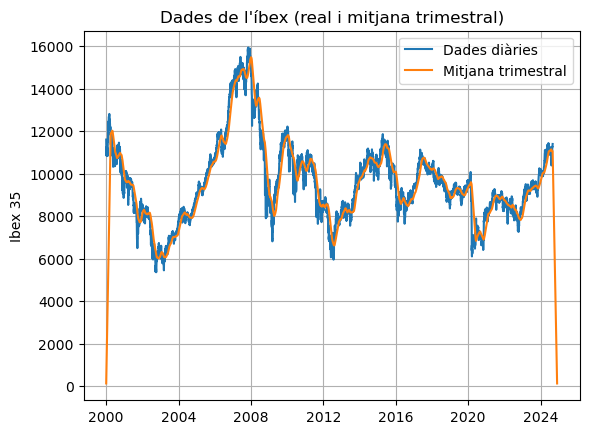

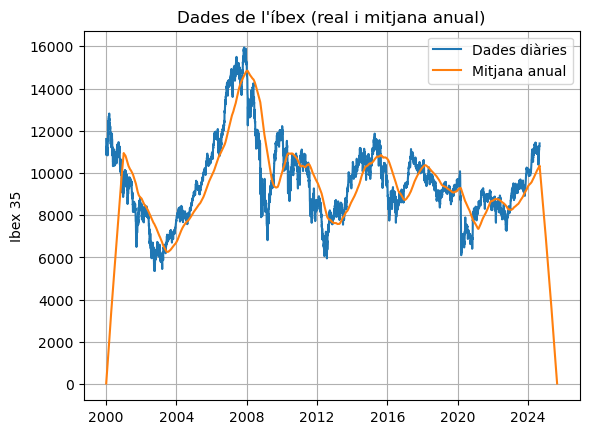

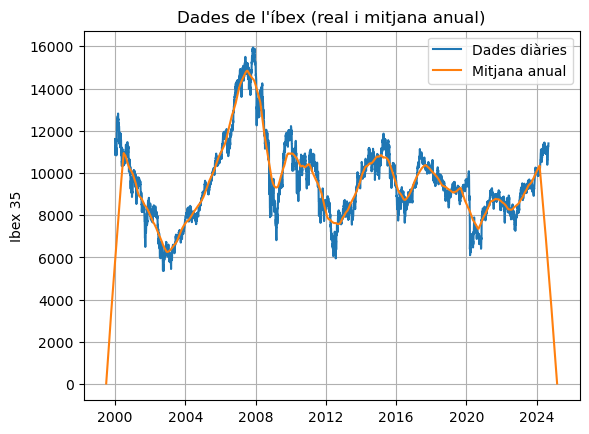

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import convolve

def plotibex(Tx, Ty, mitjana):
    """
    Presenta 2 gràfiques SUPERPOSADES corresponents a les dades de l'íbex («x») i la seva mitjana mòbil («y»)
    
    Paràmetres:
      Tx: Una TUPLA (x,nx) que conté, en aquest ordre, el senyal «x» i la seqüencia d'índexs associada, «nx».
      Ty: Una TUPLA (y,ny) que conté, en aquest ordre, el senyal «y» i la seqüencia d'índexs associada, «ny».
      mitjana: Una de les 3 CADENES DE CARÀCTERS 'setmanal', 'trimestral' o 'anual' que indica la profunditat de la mitjana mòbil.
      
      Òbviament, els dos vectors de cada TUPLA han de tenir la MATEIXA LONGITUD.
      
    Retorna: Res (però dibuixa les 2 gràfiques superposades)
    """
    if mitjana not in {'setmanal','trimestral','anual'}:
        missatge = "Heu d'assignar al paràmetre «mitjana» el valor 'setmanal','trimestral' o 'anual'"
        print(missatge)
        raise Exception(missatge)
    fig, ax = plt.subplots(1, 1)
    ax.plot(Tx[1], Tx[0], label='Dades diàries')
    ax.plot(Ty[1], Ty[0], label='Mitjana {}'.format(mitjana))
    ax.grid(True)
    ax.set_ylabel('Ibex 35')
    titol = "Dades de l'íbex (real i mitjana {})".format(mitjana)
    ax.set_title(titol)
    ax.legend()

dades = pd.read_csv(
    'Ibex35.csv',                     # Fitxer de dades (ha d'estar a la mateixa carpeta que aquest Notebook, o indicar la ruta)
    delimiter = ',',                  # Els camps estan delimitats per comes
    header = 0,                       # 1a. fila conté noms de les columnes
    usecols = ['Data', 'Íbex'],  # Seleccionem columnes concretes (totes, en aquest cas)
    index_col = 'Data',               # 1a. columna (dates) serà l'índex
    parse_dates = ['Data'],           # Interpreta i converteix les dates
)

# Visualitzem un fragment de la taula. Fixeu-vos en les dates inicial i final de l'interval
print(dades)

tmp = dades.plot(grid=True, title="Valor de l'Íbex 35 (2000-2024)")     # Dibuix automàtic. L'assignació del «resultat» a la variable 'tmp' és simplement per evitar la impressió d'un missatge per pantalla.

# Extracció de les dades de DataFrame en vectors individuals
x = dades['Íbex'].values        # Extraiem les dades (valors de l'Íbex)
n_x = dades['Íbex'].index       # Extraiem també el vector de dates associat al vector anterior (l'utilitzarem més endavant)

# Qüestió 5
M = 5
n = np.arange(-M, 2*M + 1)
h = 1 / M * (1.0 * (n >= 0) - 1.0 * (n >= M))
print(h)
print(h[0])

# GENEREU les respostes impulsionals demanades
MS = 7
ns = np.arange(0, MS)
hs = 1 / MS * (1.0 * (ns >= 0) - 1.0 * (ns >= MS))  # Mitjana setmanal (M = 7)

MT = 91
nt = np.arange(0, MT)
ht = 1 / MT * (1.0 * (nt >= 0) - 1.0 * (nt >= MT))  # Mitjana trimestral (M = 91)

MA = 365
na = np.arange(0, MA)
ha = 1 / MA * (1.0 * (na >= 0) - 1.0 * (na >= MA))  # Mitjana anual (M = 365)

# CALCULEU per cada cas les convolucions amb les dades de l'íbex per tal de computar les mitjanes mòbils setmanals, trimestrals i anuals.
ys = convolve(x, hs)
yt = convolve(x, ht)
ya = convolve(x, ha)

LS = len(ys)
LT = len(yt)
LA = len(ya)

# GENEREU els vectors de dates demanats usant la funció «date_range» de Pandas
n_ys = pd.date_range(start = "2000-01-03", periods = LS, freq = '1D', inclusive = "left")
n_yt = pd.date_range(start = "2000-01-03", periods = LT, freq = '1D', inclusive = "left")
n_ya = pd.date_range(start = "2000-01-03", periods = LA, freq = '1D', inclusive = "left")

# PINTEU les dades de l'íbex i les seves mitjanes usant la funció «plotibex»
plotibex( (x, n_x), (ys, n_ys), 'setmanal' )    # Setmanal
plotibex( (x, n_x), (yt, n_yt), 'trimestral' )    # Trimestral
plotibex( (x, n_x), (ya, n_ya), 'anual' )    # Anual

# Aliniament pel mètode 1: creació d'un vector d'índexs adient

from datetime import date,timedelta          # Necessari per treballar amb dates i increments de dates
INICIAL = date(2000, 1, 1)                   # Data inicial de les dades d'entrada
M = 365                                      # Longitud de la mitjana mòbil anual (en dies)
OFFSET = timedelta(days = -(M - 1) / 2 )       # <<<<<<<<< INDIQUEU el nombre de dies a sumar/restar (cas que tingui signe negatiu) a l'índex per centrar la mitjana
n_ya = pd.date_range(start=INICIAL+OFFSET, freq='1D', periods=len(ya))   # Creem el vector d'índexs amb la data inicial i longitud adients
plotibex( (x,n_x), (ya,n_ya), 'anual' )

# Aliniament pel mètode 2: retocar el nombre de zeros de la sortida

"""
ya2 = .....       # CREEU un nou vector «ya» afegint zeros/eliminant mostres al principi per tal que les seves mostres quedin aliniades amb les de l'entrada

# Recalculem un nou vector d'índexs ja que el nombre de mostres ha canviat
# (Una alternativa és retallar també zeros del final, per tal que la longitud de la sortida coincideixi amb la de l'entrada)
n_ya2 = pd.date_range(start='1/1/2000', freq='1D', periods=len(ya2))
plotibex( (x,n_x), (ya2,n_ya2), 'anual' )
"""

plt.show()